# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

bank_data = fetch_openml(data_id=1461, as_frame=True)
df = bank_data.frame

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [11]:
print(df.info())
print(df.describe())

print("Количество пропусков по столбцам:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      45211 non-null  int64   
 1   V2      45211 non-null  category
 2   V3      45211 non-null  category
 3   V4      45211 non-null  category
 4   V5      45211 non-null  category
 5   V6      45211 non-null  int64   
 6   V7      45211 non-null  category
 7   V8      45211 non-null  category
 8   V9      45211 non-null  category
 9   V10     45211 non-null  int64   
 10  V11     45211 non-null  category
 11  V12     45211 non-null  int64   
 12  V13     45211 non-null  int64   
 13  V14     45211 non-null  int64   
 14  V15     45211 non-null  int64   
 15  V16     45211 non-null  category
 16  Class   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB
None
                 V1             V6           V10           V12           V13  \
count  45211.000000   45211.0000

In [15]:
features = ['V1', 'V6', 'V12']
X_cluster = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

agg_cluster = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_cluster.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

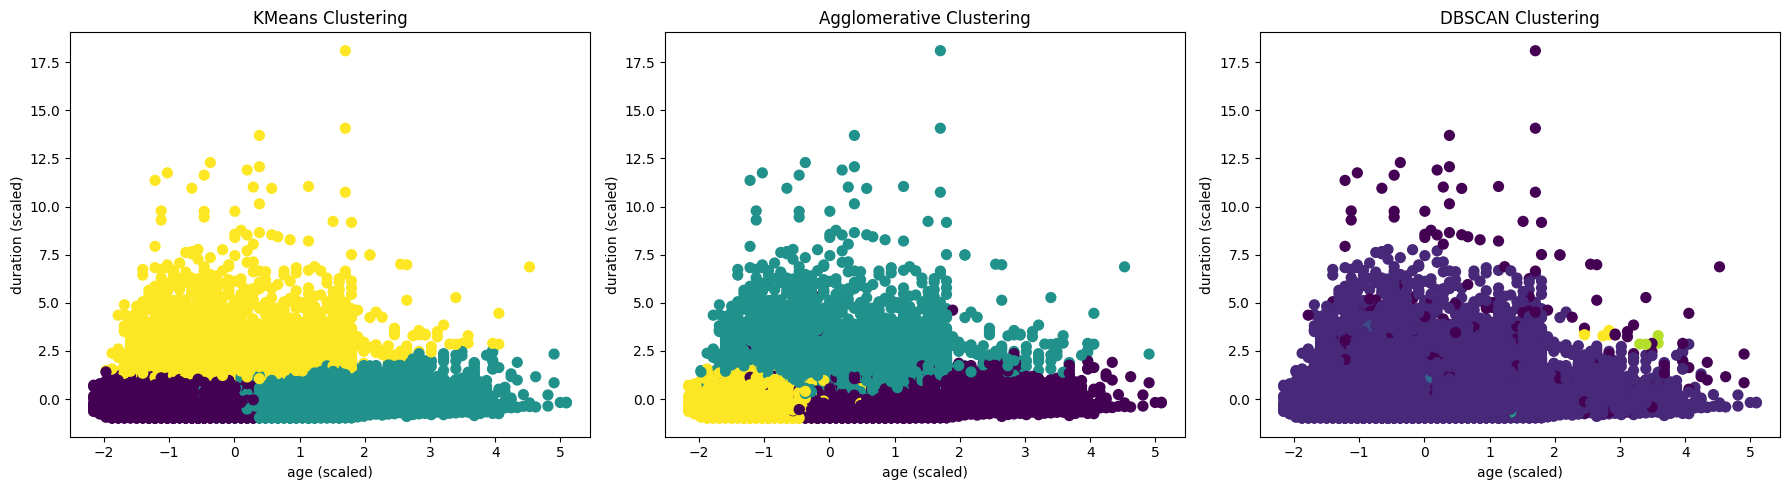

In [17]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(X_scaled[:,0], X_scaled[:,2], c=clusters_kmeans, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('age (scaled)')
plt.ylabel('duration (scaled)')

plt.subplot(1,3,2)
plt.scatter(X_scaled[:,0], X_scaled[:,2], c=clusters_agg, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('age (scaled)')
plt.ylabel('duration (scaled)')

plt.subplot(1,3,3)
plt.scatter(X_scaled[:,0], X_scaled[:,2], c=clusters_dbscan, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('age (scaled)')
plt.ylabel('duration (scaled)')

plt.tight_layout()
plt.show()

In [20]:
df_class = df.copy()

print("Распределение целевого признака:\n", df_class['Class'].value_counts())

Распределение целевого признака:
 Class
1    39922
2     5289
Name: count, dtype: int64


In [21]:
numerical_cols = df_class.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_class.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numerical_cols)
print("Категориальные признаки:", categorical_cols)

if 'class' in categorical_cols:
    categorical_cols.remove('class')

df_class_encoded = pd.get_dummies(df_class, columns=categorical_cols, drop_first=True)

Числовые признаки: ['V1', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15']
Категориальные признаки: []


In [49]:
print(df_class_encoded['Class'].isnull().sum())  # Количество NaN
print(df_class_encoded['Class'].unique())  # Проверяем уникальные значения

0
['1' '2']


In [60]:
df_class_encoded.drop('Class', axis=1)
df_class_encoded['Class'] = df_class_encoded['Class'].astype(int)
y = df_class_encoded['Class'].map({1: 1, 2: 0})  # Маппим правильные значения


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
X = pd.get_dummies(df_class_encoded.drop('Class', axis=1), drop_first=True)

In [54]:
print(X.dtypes.unique())

[dtype('int64') dtype('bool')]


In [61]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая ROC-AUC (среднее по CV):", grid_search.best_score_)

Лучшие параметры: {'max_depth': 20, 'n_estimators': 200}
Лучшая ROC-AUC (среднее по CV): 0.9287277853978422


In [63]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Точность (accuracy):", accuracy)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Точность (accuracy): 0.9061486287230905
ROC-AUC: 0.9303559347813197

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.38      0.48      1587
           1       0.92      0.98      0.95     11977

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



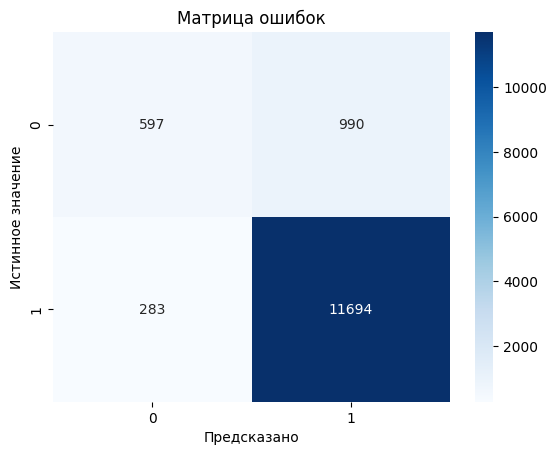

In [64]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()